In [1]:
import pickle as pkl 
%matplotlib inline
import matplotlib.pyplot as plt

import numpy as np
import scipy.io as sio


In [2]:
fin = open('../../../results/benchmark/Data8Feb2019.pkl','rb')
pred_data = pkl.load(fin)
fin.close()

fin = open('../../../datasets/benchmark/custom/Data8Feb2019.pkl', 'rb')
data = pkl.load(fin)
fin.close()


pred_speed =  list(pred_data['speed_pred'] / (2*np.pi))
pred_torque =  list(pred_data['torque_pred'] * (100/25.0))
true_speed =  list(pred_data['speed_true'] / (2*np.pi))
true_torque = list(pred_data['torque_true'] * (100/25.0))
pred_time = list(pred_data['time'].astype(np.float16))
ref_speed_interp = list(data['reference_speed_rad'][50:] / (2*np.pi))
ref_torque_interp = list(data['reference_torque_act'][50:] * 100.0 / 25.0)

out_data = {'pred_speed': pred_speed, 'pred_torque':pred_torque, 
            'true_speed':true_speed, 'true_torque': true_torque, 
            'pred_time': pred_time, 
            'ref_speed_interp': ref_speed_interp, 'ref_torque_interp': ref_torque_interp }
sio.savemat('../../../results/benchmark/Data8Feb2019.mat', out_data)

In [3]:
plt.figure(figsize=(20,10))
# plt.plot(pred_data['time'],pred_data['speed_true'])
plt.plot(pred_time,pred_speed, label="NN Output")
plt.xlabel('Time (s)')
# plt.plot(pred_time,true_speed)
plt.plot(pred_time,ref_speed_interp, alpha=0.5, label='Reference')
plt.ylabel('Speed (Hz)')
plt.legend()
plt.savefig('speed_nn_ref.png', pad_inches=0)
plt.close()

In [4]:
plt.figure(figsize=(20,10))
# plt.plot(pred_time,pred_speed, label="NN Output")
plt.xlabel('Time (s)')
plt.plot(pred_time,true_speed, label='Simulink Output')
plt.plot(pred_time,ref_speed_interp, alpha=0.5, label='Reference')
plt.ylabel('Speed (Hz)')
plt.legend()
plt.savefig('speed_simulink_ref.png', pad_inches=0)
plt.close()

In [5]:
plt.figure(figsize=(20,10))
plt.plot(pred_time,pred_speed, label="NN Output")
plt.xlabel('Time (s)')
plt.plot(pred_time,true_speed, label='Simulink Output', alpha=0.5)
# plt.plot(pred_time,ref_speed_interp, alpha=0.5, label='Reference')
plt.ylabel('Speed (Hz)')
plt.legend()
plt.savefig('speed_nn_simulink.png', pad_inches=0)
plt.close()

In [6]:
plt.figure(figsize=(20,10))
# plt.plot(data['time'],data['torque_true'])
plt.plot(pred_time,pred_torque, label="NN Output")
plt.xlabel('Time (s)')
# plt.plot(pred_time,true_torque)
plt.plot(pred_time,ref_torque_interp, label="Reference", alpha=0.5)
plt.ylabel('Torque (%Nominal=25Nm)')
plt.legend()
plt.savefig('torque_nn_ref.png', pad_inches=0)
plt.close()

In [7]:
plt.figure(figsize=(20,10))
# plt.plot(pred_time,pred_torque, label="NN Output")
plt.xlabel('Time (s)')
plt.plot(pred_time,true_torque, label="Simulink Output")
plt.plot(pred_time,ref_torque_interp, label="Reference", alpha=0.5)
plt.ylabel('Torque (%Nominal=25Nm)')
plt.legend()
plt.savefig('torque_simulink_ref.png', pad_inches=0)
plt.close()

In [8]:
plt.figure(figsize=(20,10))
# plt.plot(data['time'],data['torque_true'])
plt.plot(pred_time,pred_torque, label="NN Output")
plt.xlabel('Time (s)')
plt.plot(pred_time,true_torque, label="Simulink Output", alpha=0.5)
# plt.plot(pred_time,ref_torque_interp, label="Reference", alpha=0.5)
plt.ylabel('Torque (%Nominal=25Nm)')
plt.legend()
plt.savefig('torque_nn_simulink.png', pad_inches=0)
plt.close()

In [11]:
true_speed = np.asarray(true_speed)
pred_speed = np.asarray(pred_speed)
true_torque = np.asarray(true_torque)
pred_torque = np.asarray(pred_torque)
print ('speed r2', r2(true_speed, pred_speed))
print ('speed rmse', rmse(true_speed, pred_speed))
print ('speed mae', mae(true_speed, pred_speed))
print ('speed smape', 100 * np.sum(np.abs(true_speed - pred_speed) / (np.abs(true_speed) + np.abs(pred_speed)) / 2) / true_speed.shape[0])

print ('torque r2', r2(true_torque, pred_torque))
print ('torque rmse', rmse(true_torque, pred_torque))
print ('torque mae', mae(true_torque, pred_torque))
print ('torque smape', 100 * np.sum(np.abs(true_torque - pred_torque) / (np.abs(true_torque) + np.abs(pred_torque)) / 2) / true_torque.shape[0])


speed r2 0.9997256169476
speed rmse 0.43276456
speed mae 0.3494057
speed smape 2.299832528629279
torque r2 0.9986265774612701
torque rmse 1.7704664
torque mae 1.0567111
torque smape 5.246891344871974


In [12]:
fin = open('../../../results/benchmark/0.pkl','rb')
pred_data = pkl.load(fin)
fin.close()

fin = open('../../../datasets/benchmark/custom/0.pkl', 'rb')
data = pkl.load(fin)
fin.close()


pred_speed =  list(pred_data['speed_pred'] / (2*np.pi))
pred_torque =  list(pred_data['torque_pred'] * (100/25.0))
true_speed =  list(pred_data['speed_true'] / (2*np.pi))
true_torque = list(pred_data['torque_true'] * (100/25.0))
pred_time = list(pred_data['time'].astype(np.float16))
ref_speed_interp = list(data['reference_speed_rad'][50:] / (2*np.pi))
ref_torque_interp = list(data['reference_torque_act'][50:] * 100.0 / 25.0)

out_data = {'pred_speed': pred_speed, 'pred_torque':pred_torque, 
            'true_speed':true_speed, 'true_torque': true_torque, 
            'pred_time': pred_time, 
            'ref_speed_interp': ref_speed_interp, 'ref_torque_interp': ref_torque_interp }

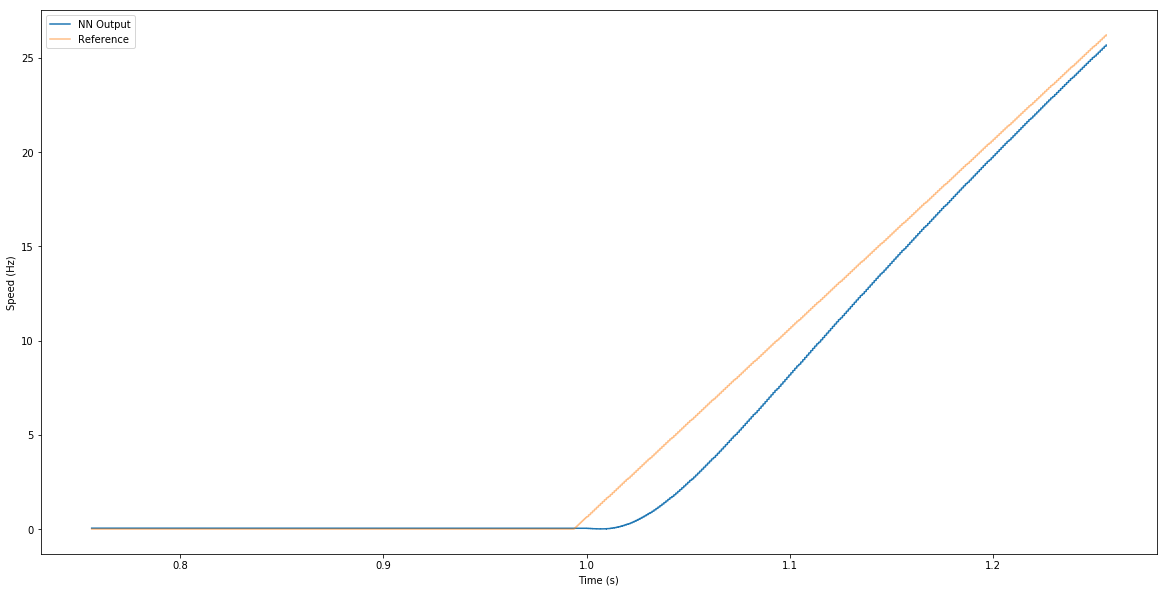

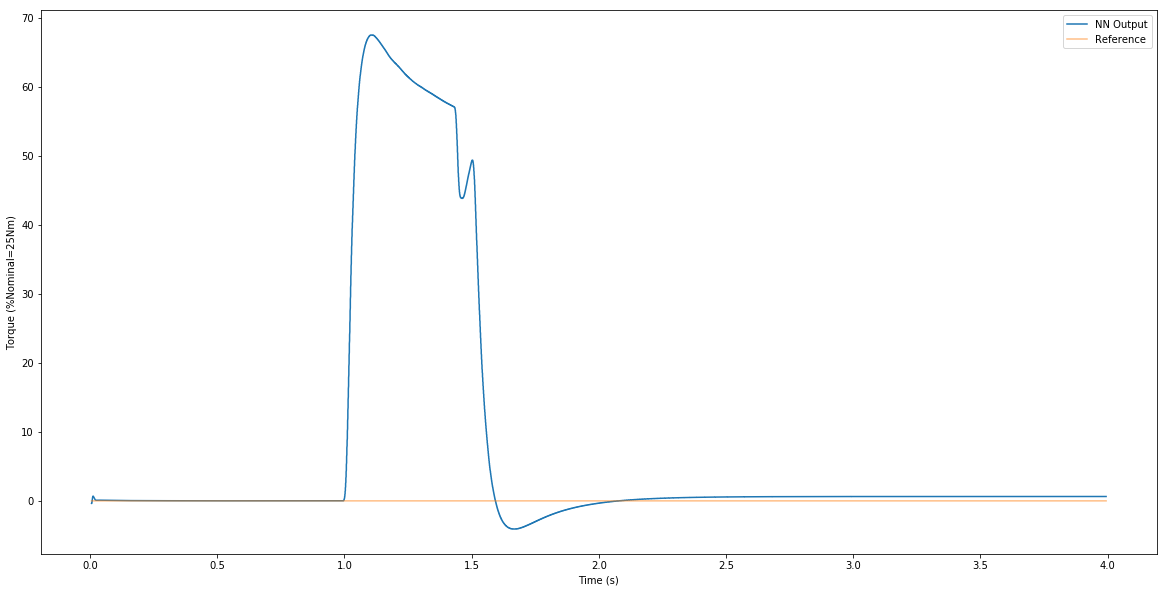

In [18]:
plt.figure(figsize=(20,10))
# plt.plot(pred_data['time'],pred_data['speed_true'])
plt.plot(pred_time[3000:5000],pred_speed[3000:5000], label="NN Output")
plt.xlabel('Time (s)')
# plt.plot(pred_time,true_speed)
plt.plot(pred_time[3000:5000],ref_speed_interp[3000:5000], alpha=0.5, label='Reference')
plt.ylabel('Speed (Hz)')
plt.legend()
plt.savefig('0-speed_nn_ref.png', pad_inches=0)
# plt.close()

plt.figure(figsize=(20,10))
# plt.plot(data['time'],data['torque_true'])
plt.plot(pred_time,pred_torque, label="NN Output")
plt.xlabel('Time (s)')
# plt.plot(pred_time,true_torque)
plt.plot(pred_time,ref_torque_interp, label="Reference", alpha=0.5)
plt.ylabel('Torque (%Nominal=25Nm)')
plt.legend()
plt.savefig('0-torque_nn_ref.png', pad_inches=0)
# plt.close()

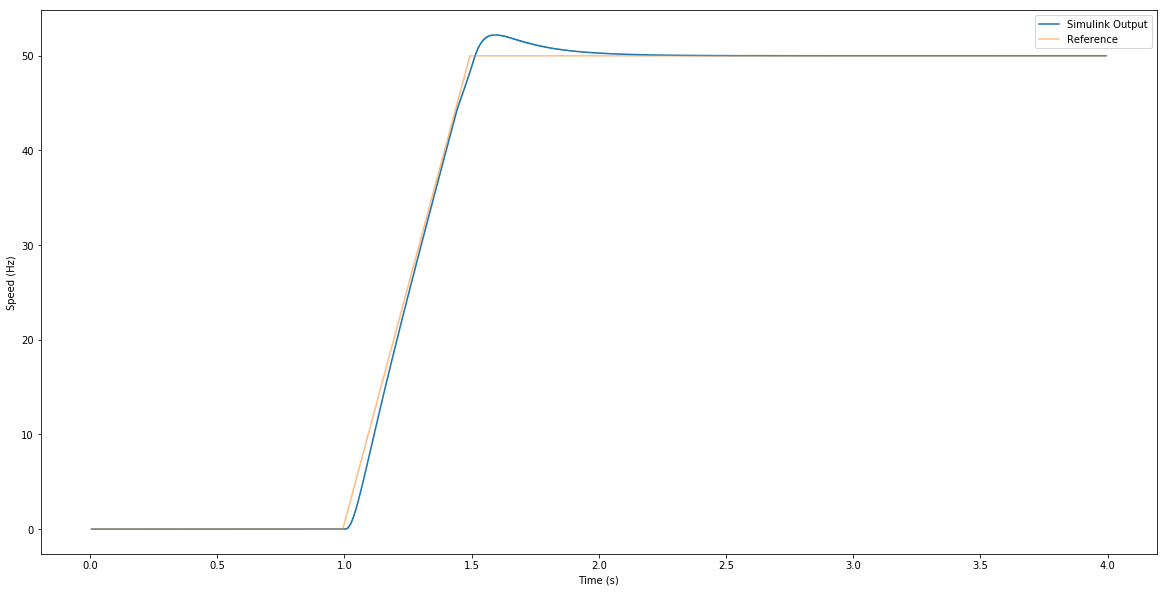

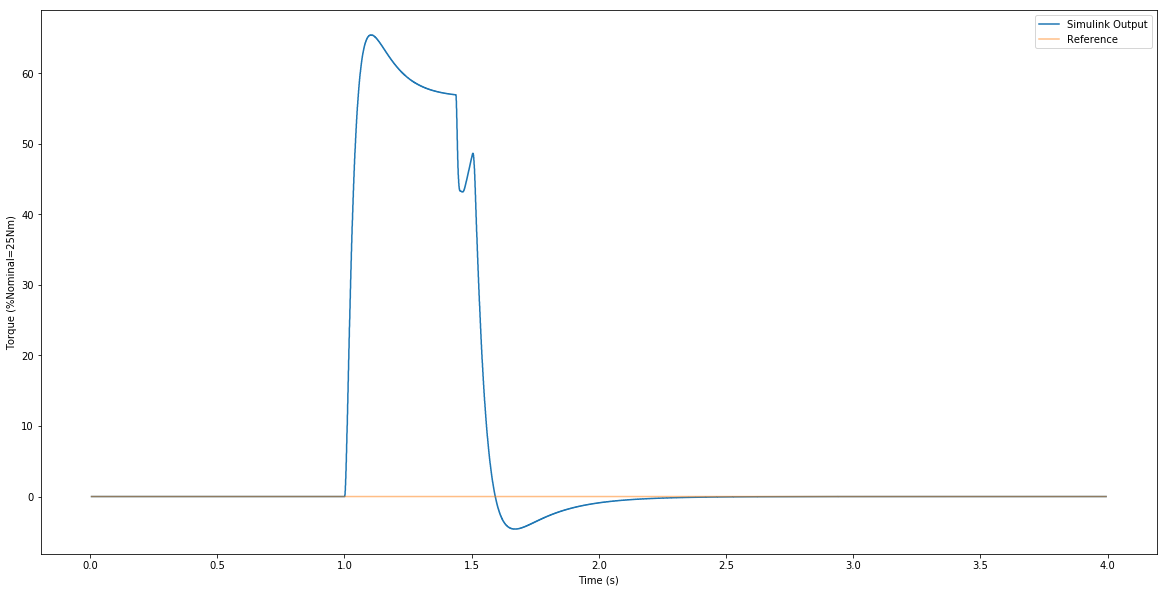

In [17]:
plt.figure(figsize=(20,10))
# plt.plot(pred_data['time'],pred_data['speed_true'])
# plt.plot(pred_time,pred_speed, label="NN Output")
plt.xlabel('Time (s)')
plt.plot(pred_time,true_speed, label="Simulink Output")
plt.plot(pred_time,ref_speed_interp, alpha=0.5, label='Reference')
plt.ylabel('Speed (Hz)')
plt.legend()
plt.savefig('0-speed_simulink_ref.png', pad_inches=0)
# plt.close()

plt.figure(figsize=(20,10))
# plt.plot(pred_time,pred_torque, label="NN Output")
plt.xlabel('Time (s)')
plt.plot(pred_time,true_torque, label="Simulink Output")
plt.plot(pred_time,ref_torque_interp, label="Reference", alpha=0.5)
plt.ylabel('Torque (%Nominal=25Nm)')
plt.legend()
plt.savefig('0-torque_simulink_ref.png', pad_inches=0)
# plt.close()

In [186]:
plt.figure(figsize=(20,10))
# plt.plot(pred_data['time'],pred_data['speed_true'])
plt.plot(pred_time,pred_speed, label="NN Output")
plt.xlabel('Time (s)')
plt.plot(pred_time,true_speed, label="Simulink Output", alpha=0.5)
# plt.plot(pred_time,ref_speed_interp, alpha=0.5, label='Reference')
plt.ylabel('Speed (Hz)')
plt.legend()
plt.savefig('0-speed_nn_simulink.png',  pad_inches=0)
plt.close()

plt.figure(figsize=(20,10))
# plt.plot(data['time'],data['torque_true'])
plt.plot(pred_time,pred_torque, label="NN Output")
plt.xlabel('Time (s)')
plt.plot(pred_time,true_torque, label="Simulink Output", alpha=0.5)
# plt.plot(pred_time,ref_torque_interp, label="Reference", alpha=0.5)
plt.ylabel('Torque (%Nominal=25Nm)')
plt.legend()
plt.savefig('0-torque_nn_simulink.png', pad_inches=0)
plt.close()

In [16]:
print ()
t2 = pred_time[4000-25:][np.argmax(np.asarray(pred_speed[4000-25:]) >= 0.02 * np.asarray(ref_speed_interp[4000-25:]))] - 1
t95 = pred_time[4000-25:][np.argmax(np.asarray(pred_speed[4000-25:]) >= 0.95 * np.asarray(ref_speed_interp[4000-25:]))] - 1
overshoot_loc = np.argmax(np.asarray(pred_speed[4000-25:]))
overshoot = (pred_speed[4000-25:][overshoot_loc] - ref_speed_interp[4000-25:][overshoot_loc]) / ref_speed_interp[4000-25:][overshoot_loc] * 100
following_loc = np.argmax(np.asarray(ref_speed_interp) == 0.5 * 50)
following_error = pred_speed[following_loc] - ref_speed_interp[following_loc]
print ('NN: ', '2% response time = ', t2, '95% response time = ', t95, 'overshoot error = ', overshoot, 'following error = ', following_error, 'max acceleration torque = ', np.max(pred_torque))

t2 = pred_time[4000-25:][np.argmax(np.asarray(true_speed[4000-25:]) >= 0.02 * np.asarray(ref_speed_interp[4000-25:]))] - 1
t95 = pred_time[4000-25:][np.argmax(np.asarray(true_speed[4000-25:]) >= 0.95 * np.asarray(ref_speed_interp[4000-25:]))] - 1
overshoot_loc = np.argmax(np.asarray(true_speed[4000-25:]))
overshoot = (true_speed[4000-25:][overshoot_loc] - ref_speed_interp[4000-25:][overshoot_loc]) / ref_speed_interp[4000-25:][overshoot_loc] * 100
following_loc = np.argmax(np.asarray(ref_speed_interp) == 0.5 * 50)
following_error = true_speed[following_loc] - ref_speed_interp[following_loc]
print ('Simulink: ', '2% response time = ', t2, '95% response time = ', t95, 'overshoot error = ', overshoot, 'following error = ', following_error, 'max acceleration torque = ', np.max(true_torque))

NN:  2% response time =  0.0 95% response time =  0.1904296875 overshoot error =  4.215339660644531 following error =  -0.5834617614746094 max acceleration torque =  67.515686
Simulink:  2% response time =  0.0087890625 95% response time =  0.2255859375 overshoot error =  4.41851806640625 following error =  -1.0487937927246094 max acceleration torque =  65.42239


In [10]:
import sys
sys.path.append('../')
from utils.metrics import *

In [189]:
true_speed = np.asarray(true_speed)
pred_speed = np.asarray(pred_speed)
true_torque = np.asarray(true_torque)
pred_torque = np.asarray(pred_torque)
print ('speed r2', r2(true_speed, pred_speed))
print ('speed rmse', rmse(true_speed, pred_speed))
print ('speed mae', mae(true_speed, pred_speed))
print ('speed smape', 100 * np.sum(np.abs(true_speed - pred_speed) / (np.abs(true_speed) + np.abs(pred_speed)) / 2) / true_speed.shape[0])

print ('torque r2', r2(true_torque, pred_torque))
print ('torque rmse', rmse(true_torque, pred_torque))
print ('torque mae', mae(true_torque, pred_torque))
print ('torque smape', 100 * np.sum(np.abs(true_torque - pred_torque) / (np.abs(true_torque) + np.abs(pred_torque)) / 2) / true_torque.shape[0])


speed r2 0.9999153898608879
speed rmse 0.20436265
speed mae 0.17479636
speed smape 12.694478341385336
torque r2 0.9984425876724825
torque rmse 0.7556141
torque mae 0.56935656
torque smape 38.08588239961444


In [159]:
fin = open('../../../results/benchmark/1.pkl','rb')
pred_data = pkl.load(fin)
fin.close()

fin = open('../../../datasets/benchmark/custom/1.pkl', 'rb')
data = pkl.load(fin)
fin.close()


pred_speed =  list(pred_data['speed_pred'] / (2*np.pi))
pred_torque =  list(pred_data['torque_pred'] * (100/25.0))
true_speed =  list(pred_data['speed_true'] / (2*np.pi))
true_torque = list(pred_data['torque_true'] * (100/25.0))
pred_time = list(pred_data['time'].astype(np.float16))
ref_speed_interp = list(data['reference_speed_rad'][50:] / (2*np.pi))
ref_torque_interp = list(data['reference_torque_act'][50:] * 100.0 / 25.0)

out_data = {'pred_speed': pred_speed, 'pred_torque':pred_torque, 
            'true_speed':true_speed, 'true_torque': true_torque, 
            'pred_time': pred_time, 
            'ref_speed_interp': ref_speed_interp, 'ref_torque_interp': ref_torque_interp }

In [160]:
plt.figure(figsize=(20,10))
# plt.plot(pred_data['time'],pred_data['speed_true'])
plt.plot(pred_time,pred_speed, label="NN Output")
plt.xlabel('Time (s)')
# plt.plot(pred_time,true_speed)
plt.plot(pred_time,ref_speed_interp, alpha=0.5, label='Reference')
plt.ylabel('Speed (Hz)')
plt.legend()
plt.savefig('1-speed_nn_ref.png', pad_inches=0)
plt.close()

plt.figure(figsize=(20,10))
# plt.plot(data['time'],data['torque_true'])
plt.plot(pred_time,pred_torque, label="NN Output")
plt.xlabel('Time (s)')
# plt.plot(pred_time,true_torque)
plt.plot(pred_time,ref_torque_interp, label="Reference", alpha=0.5)
plt.ylabel('Torque (%Nominal=25Nm)')
plt.legend()
plt.savefig('1-torque_nn_ref.png', pad_inches=0)
plt.close()

In [161]:
plt.figure(figsize=(20,10))
# plt.plot(pred_data['time'],pred_data['speed_true'])
# plt.plot(pred_time,pred_speed, label="NN Output")
plt.xlabel('Time (s)')
plt.plot(pred_time,true_speed, label="Simulink Output")
plt.plot(pred_time,ref_speed_interp, alpha=0.5, label='Reference')
plt.ylabel('Speed (Hz)')
plt.legend()
plt.savefig('1-speed_simulink_ref.png', pad_inches=0)
plt.close()

plt.figure(figsize=(20,10))
# plt.plot(pred_time,pred_torque, label="NN Output")
plt.xlabel('Time (s)')
plt.plot(pred_time,true_torque, label="Simulink Output")
plt.plot(pred_time,ref_torque_interp, label="Reference", alpha=0.5)
plt.ylabel('Torque (%Nominal=25Nm)')
plt.legend()
plt.savefig('1-torque_simulink_ref.png', pad_inches=0)
plt.close()

In [162]:
plt.figure(figsize=(20,10))
# plt.plot(pred_data['time'],pred_data['speed_true'])
plt.plot(pred_time,pred_speed, label="NN Output")
plt.xlabel('Time (s)')
plt.plot(pred_time,true_speed, label="Simulink Output", alpha=0.5)
# plt.plot(pred_time,ref_speed_interp, alpha=0.5, label='Reference')
plt.ylabel('Speed (Hz)')
plt.legend()
plt.savefig('1-speed_nn_simulink.png',  pad_inches=0)
plt.close()

plt.figure(figsize=(20,10))
# plt.plot(data['time'],data['torque_true'])
plt.plot(pred_time,pred_torque, label="NN Output")
plt.xlabel('Time (s)')
plt.plot(pred_time,true_torque, label="Simulink Output", alpha=0.5)
# plt.plot(pred_time,ref_torque_interp, label="Reference", alpha=0.5)
plt.ylabel('Torque (%Nominal=25Nm)')
plt.legend()
plt.savefig('1-torque_nn_simulink.png', pad_inches=0)
plt.close()

In [163]:
t2 = pred_time[4000-25:][np.argmax(np.asarray(pred_speed[4000-25:]) >= 0.02 * np.asarray(ref_speed_interp[4000-25:]))]
t95 = pred_time[4000-25:][np.argmax(np.asarray(pred_speed[4000-25:]) >= 0.95 * np.asarray(ref_speed_interp[4000-25:]))]
overshoot_loc = np.argmax(np.asarray(pred_speed[4000-25:]))
overshoot = (pred_speed[4000-25:][overshoot_loc] - ref_speed_interp[4000-25:][overshoot_loc]) / ref_speed_interp[4000-25:][overshoot_loc] * 100
following_loc = np.argmax(np.asarray(ref_speed_interp) == 0.5 * 50)
following_error = pred_speed[following_loc] - ref_speed_interp[following_loc]
print ('NN: ', '2% response time = ', t2, '95% response time = ', t95, 'overshoot error = ', overshoot, 'following error = ', following_error, 'max acceleration torque = ', np.max(pred_torque))

t2 = pred_time[4000-25:][np.argmax(np.asarray(true_speed[4000-25:]) >= 0.02 * np.asarray(ref_speed_interp[4000-25:]))]
t95 = pred_time[4000-25:][np.argmax(np.asarray(true_speed[4000-25:]) >= 0.95 * np.asarray(ref_speed_interp[4000-25:]))]
overshoot_loc = np.argmax(np.asarray(true_speed[4000-25:]))
overshoot = (true_speed[4000-25:][overshoot_loc] - ref_speed_interp[4000-25:][overshoot_loc]) / ref_speed_interp[4000-25:][overshoot_loc] * 100
following_loc = np.argmax(np.asarray(ref_speed_interp) == 0.5 * 50)
following_error = true_speed[following_loc] - ref_speed_interp[following_loc]
print ('Simulink: ', '2% response time = ', t2, '95% response time = ', t95, 'overshoot error = ', overshoot, 'following error = ', following_error, 'max acceleration torque = ', np.max(true_torque))

NN:  2% response time =  1.0 95% response time =  1.328 overshoot error =  3.9885787963867188 following error =  -2.3622303009033203 max acceleration torque =  177.26465
Simulink:  2% response time =  1.021 95% response time =  1.29 overshoot error =  3.8013458251953125 following error =  -2.150270462036133 max acceleration torque =  179.47513


In [164]:
import sys
sys.path.append('../')
from utils.metrics import *

In [165]:
true_speed = np.asarray(true_speed)
pred_speed = np.asarray(pred_speed)
true_torque = np.asarray(true_torque)
pred_torque = np.asarray(pred_torque)
print ('speed r2', r2(true_speed, pred_speed))
print ('speed rmse', rmse(true_speed, pred_speed))
print ('speed mae', mae(true_speed, pred_speed))
print ('speed smape', 100 * np.sum(np.abs(true_speed - pred_speed) / (np.abs(true_speed) + np.abs(pred_speed)) / 2) / true_speed.shape[0])

print ('torque r2', r2(true_torque, pred_torque))
print ('torque rmse', rmse(true_torque, pred_torque))
print ('torque mae', mae(true_torque, pred_torque))
print ('torque smape', 100 * np.sum(np.abs(true_torque - pred_torque) / (np.abs(true_torque) + np.abs(pred_torque)) / 2) / true_torque.shape[0])


speed r2 0.9999059480438626
speed rmse 0.2169637
speed mae 0.13627388
speed smape 13.37282684079368
torque r2 0.9986869401461
torque rmse 1.8632985
torque mae 1.4943761
torque smape 12.840838740517835


In [192]:
import glob



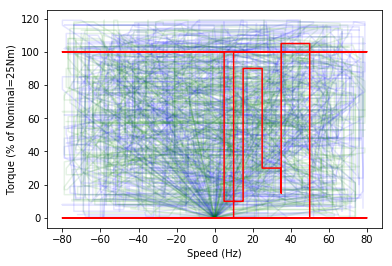

In [218]:
trains = glob.glob('../../../datasets/benchmark/train/*')

for train in trains:
    fin = open(train,'rb')
    data = pkl.load(fin)
    fin.close()

    plt.plot(data['reference_speed_rad'] / (2*np.pi), data['reference_torque_act'] *100.0/25.0, color='b', alpha=0.1)
    
vals = glob.glob('../../../datasets/benchmark/val/*')

for val in vals:
    fin = open(val,'rb')
    data = pkl.load(fin)
    fin.close()

    plt.plot(data['reference_speed_rad'] / (2*np.pi), data['reference_torque_act'] *100.0/25.0, color='g', alpha=0.1)
    
    
customs = glob.glob('../../../datasets/benchmark/custom/*')

for custom in customs:
    fin = open(custom,'rb')
    data = pkl.load(fin)
    fin.close()

    plt.plot(data['reference_speed_rad'] / (2*np.pi), data['reference_torque_act'] *100.0/25.0, color='r', alpha=1)
    
    
plt.xlabel('Speed (Hz)')
plt.ylabel('Torque (% of Nominal=25Nm)')
plt.savefig('learning.png', dpi=500, pad_inches=0)

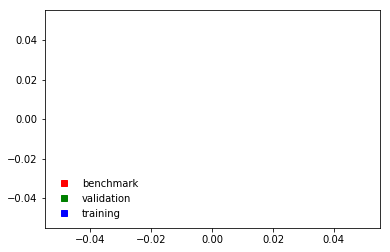

In [220]:
colors = ["red", "green", "blue"]
f = lambda m,c: plt.plot([],[],marker=m, color=c, ls="none")[0]
handles = [f("s", colors[i]) for i in range(3)]
labels = ["benchmark", "validation", "training"]
legend = plt.legend(handles, labels, loc=3, framealpha=1, frameon=False)

def export_legend(legend, filename="legend.png"):
    fig  = legend.figure
    fig.canvas.draw()
    bbox  = legend.get_window_extent().transformed(fig.dpi_scale_trans.inverted())
    fig.savefig(filename, dpi=500, bbox_inches=bbox)

export_legend(legend)
plt.show()